<a href="https://colab.research.google.com/github/Karlosicolombia/Synthethic-Training-Data-for-Sponswatch-AB/blob/main/masking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [5]:
from google.colab import drive
drive.mount('/content/drive')

directory ='/content/drive/MyDrive/adidas'

Mounted at /content/drive


In [157]:
from google.colab.patches import cv2_imshow

img = cv2.imread(r'/content/drive/MyDrive/Adidas/Adidas/144503924.jpg')
#cv2_imshow(img)

In [158]:
kernel = np.ones((5, 5), np.uint8)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [159]:
Lower_hsv = np.array([51, 120, 0])
Upper_hsv = np.array([255, 255, 255])

In [160]:
# creating the mask by eroding,morphing,
# dilating process
Mask = cv2.inRange(hsv, Lower_hsv, Upper_hsv)
Mask = cv2.erode(Mask, kernel, iterations=1)
Mask = cv2.morphologyEx(Mask, cv2.MORPH_OPEN, kernel)
Mask = cv2.dilate(Mask, kernel, iterations=1)

In [161]:
Mask = cv2.bitwise_not(Mask)

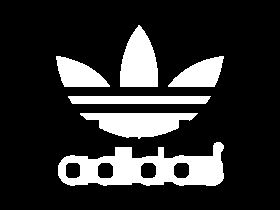

In [162]:
# Displaying the image
cv2_imshow(Mask)

In [14]:
# waits for user to press any key
# (this is necessary to avoid Python 
# kernel form crashing)
cv2.waitKey(0)

-1

In [169]:
# closing all open windows
cv2.destroyAllWindows()

In [181]:
def flip(img,use):
  rand = np.random.uniform(0,1)
  image = img
  if rand > 0.5:
    image = cv2.flip(img, 0)
    return image
  else:
    return image

#Mask = augmentationflip(Mask, True)
#cv2_imshow(Mask)




In [177]:
import numpy as np
def rotation(img,rotation):
  rotation = int(np.random.uniform(-rotation,rotation))
  h,w = img.shape[:2]
  matrix = cv2.getRotationMatrix2D((int(w/2),int(h/2)),rotation,1 )
  image = cv2.warpAffine(img, matrix, (w, h))
  return image

#rotated = rotation(Mask,180)
#cv2_imshow(rotated) 



In [175]:
def randomblur(img):
  Kx = (np.random.randint(0,15))
  Ky = Kx
  if Kx > 0:
    kernel = (Kx,Ky)
    image = cv2.blur(img,kernel)
    return image
  else: 
    return image




In [167]:
def crop(img):
  randh = int(img.shape[0]*(np.random.uniform(0,3)))
  randw = int(img.shape[1]*(np.random.uniform(0,3)))
  dim = (randw,randh)
  print(dim)
  image = cv2.resize(img, dim, interpolation = cv2.INTER_NEAREST)
  return image






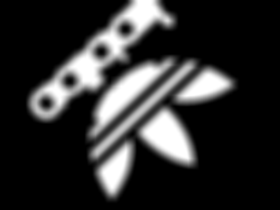

In [185]:
image = flip(Mask,True)
image = rotation(image,180)
image = randomblur(image)

cv2_imshow(image)